# TP : Prise en main de l'API Codecarbon

## Imports

In [ ]:
# !pip install codecarbon
# !pip install scikit-learn
# !pip install pandas
# !pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import time

from sklearn.metrics import accuracy_score

SEED = 42

# Méthode 1 : start/stop

In [3]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker(save_to_file=False, log_level="critical")
tracker.start()

""" insert your code here """

emissions: float = tracker.stop()

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)

ERROR: Failed to find the Power Gadget driver (com_intel_driver_EnergyDriver)



# TP : Intégrer le monitoring dans un notebook classique de ML

## Création d'un dataset d'exemple
Ceci est un exemple, vous pouvez très bien changer de dataset :).

In [4]:
# make classification dataset
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000, n_features=30, n_informative=20, n_redundant=10, random_state=SEED
)

# split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

## Partie preprocessing : Training
Libre à vous de modifier le feature engineering.

In [5]:
# pca for dimensionality reduction
from sklearn.decomposition import PCA

start = time.time()
pca = PCA(n_components=20, random_state=SEED)
X_train_pca = pca.fit_transform(X_train)
pca_time = time.time() - start
print(f"PCA time: {pca_time}")

# preprocess data
from sklearn.preprocessing import StandardScaler

start = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
scaler_time = time.time() - start
print(f"Scaler time: {scaler_time}")

preprocess_time = pca_time + scaler_time

PCA time: 0.03447437286376953
Scaler time: 0.0048809051513671875


## Partie preprocessing : Inference

In [6]:
start = time.time()
X_test_pca = pca.transform(X_test)
X_test_scaled = scaler.transform(X_test_pca)
preprocess_inf_time = time.time() - start
print(
    f"Preprocess inference time (1000 samples): {preprocess_inf_time * 1000 / len(X_test)}"
)

Preprocess inference time (1000 samples): 0.0020663261413574217


## Définition des modèles à tester
Libre à vous de changer de modèles etc..

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

base_models = {
    "RF": {
        "model": RandomForestClassifier(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": 0,
    },
    "LR": {
        "model": LogisticRegression(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": 0,
    },
    "SVC": {
        "model": SVC(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": 0,
    },
    "MLP": {
        "model": MLPClassifier(random_state=SEED),
        "train_time": 0,
        "inference_time": 0,
        "score": 0,
        "carbon_emissions": 0,
    },
}

preprocessed_models = deepcopy(base_models)

# Entraînement

## Sans feature engineering

In [8]:
for model_name, model_dict in base_models.items():
    print(f"Training {model_name}")
    model = model_dict["model"]
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    model_dict["train_time"] = end - start
    print("Model trained in", model_dict["train_time"], "seconds")

Training RandomForest
Model trained in 5.141258955001831 seconds
Training LogisticRegression
Model trained in 0.03290700912475586 seconds
Training SVC
Model trained in 1.6469190120697021 seconds
Training MLP
Model trained in 9.099963188171387 seconds


/Users/camille.hascoet/Documents/greenai/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Avec feature engineering

In [9]:
for model_name, model_dict in preprocessed_models.items():
    print(f"Training {model_name}")
    model = model_dict["model"]
    start = time.time()
    model.fit(X_train_scaled, y_train)
    end = time.time()
    model_dict["train_time"] = end - start + preprocess_time
    print("Model trained in", model_dict["train_time"], "seconds")

Training RandomForest
Model trained in 4.531726360321045 seconds
Training LogisticRegression
Model trained in 0.04778409004211426 seconds
Training SVC
Model trained in 0.9283032417297363 seconds
Training MLP
Model trained in 10.313502311706543 seconds


/Users/camille.hascoet/Documents/greenai/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Méthode 2 : Décorateur

In [10]:
from codecarbon import track_emissions


@track_emissions(project_name="project_to_track", experiment_id=hash)
def function_to_track():
    """Insert your code here"""

    return


# Run function
function_to_track()

# Access emissions informations
pd.read_csv("./emissions.csv").tail(1)

[codecarbon INFO @ 17:02:16] [setup] RAM Tracking...
[codecarbon INFO @ 17:02:16] [setup] GPU Tracking...
[codecarbon INFO @ 17:02:16] No GPU found.
[codecarbon INFO @ 17:02:16] [setup] CPU Tracking...
[codecarbon INFO @ 17:02:16] Tracking Intel CPU via Power Gadget
[codecarbon INFO @ 17:02:18] >>> Tracker's metadata:
[codecarbon INFO @ 17:02:18]   Platform system: macOS-14.5-x86_64-i386-64bit
[codecarbon INFO @ 17:02:18]   Python version: 3.12.2
[codecarbon INFO @ 17:02:18]   CodeCarbon version: 2.3.4
[codecarbon INFO @ 17:02:18]   Available RAM : 16.000 GB
[codecarbon INFO @ 17:02:18]   CPU count: 8
[codecarbon INFO @ 17:02:18]   CPU model: Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz
[codecarbon INFO @ 17:02:18]   GPU count: None
[codecarbon INFO @ 17:02:18]   GPU model: None
[codecarbon INFO @ 17:02:20] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 17:02:20] Energy consumed for RAM : 0.000000 kWh. RAM Power : 6.0 W
ERROR: Failed

timestamp      project_name  \
19  2024-05-23T17:02:20  project_to_track   

                                  run_id  duration     emissions  \
19  bc6c6d42-add2-42c9-925c-fd7a8b116ab1  0.246014  1.244391e-10   

    emissions_rate  cpu_power  gpu_power  ram_power  cpu_energy  ...  \
19    5.058211e-10        0.0        0.0        6.0         0.0  ...   

    cpu_count                                 cpu_model  gpu_count gpu_model  \
19          8  Intel(R) Core(TM) i7-8569U CPU @ 2.80GHz        NaN       NaN   

   longitude latitude  ram_total_size  tracking_mode on_cloud  pue  
19    2.3965  48.6735            16.0        machine        N  1.0  

[1 rows x 31 columns]

# Inférence

In [11]:
def evaluate_model(model, X_test, y_test, preprocessed: bool = False):
    start = time.time()
    y_pred = model.predict(X_test_scaled if preprocessed else X_test)
    end = time.time()
    inference_time = (
        (end - start + preprocess_inf_time) if preprocessed else (end - start)
    )
    score = accuracy_score(y_test, y_pred)
    return score, inference_time

## Sans feature engineering

In [12]:
for model_name, model_dict in base_models.items():
    model = model_dict["model"]
    score, inference_time = evaluate_model(model, X_test, y_test)
    model_dict["score"] = score
    model_dict["inference_time"] = inference_time

## Avec feature engineering

In [13]:
for model_name, model_dict in preprocessed_models.items():
    model = model_dict["model"]
    score, inference_time = evaluate_model(
        model, X_test_scaled, y_test, preprocessed=True
    )
    model_dict["score"] = score
    model_dict["inference_time"] = inference_time

## Comparaison des résultats

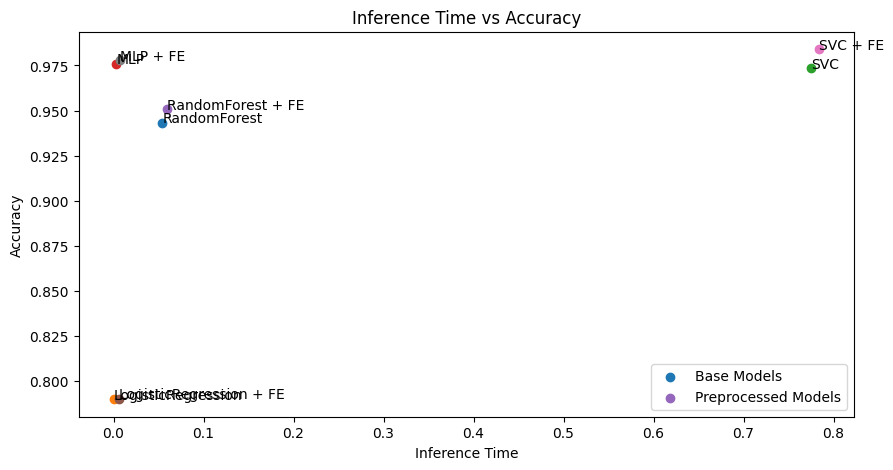

In [14]:
plt.figure(figsize=(10, 5))
# scatter plot of inference time vs accuracy
for i, (model_name, model_dict) in enumerate(base_models.items()):
    (
        plt.scatter(
            model_dict["inference_time"], model_dict["score"], label="Base Models"
        )
        if i == 0
        else plt.scatter(model_dict["inference_time"], model_dict["score"])
    )
    plt.text(model_dict["inference_time"], model_dict["score"], model_name)

for i, (model_name, model_dict) in enumerate(preprocessed_models.items()):
    (
        plt.scatter(
            model_dict["inference_time"],
            model_dict["score"],
            label="Preprocessed Models",
        )
        if i == 0
        else plt.scatter(model_dict["inference_time"], model_dict["score"])
    )
    plt.text(model_dict["inference_time"], model_dict["score"], model_name + " + FE")

plt.xlabel("Inference Time")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Inference Time vs Accuracy")
plt.show()